In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print(cv2.__version__)

4.10.0


In [2]:
img=cv2.imread('/content/dog2.jpg')

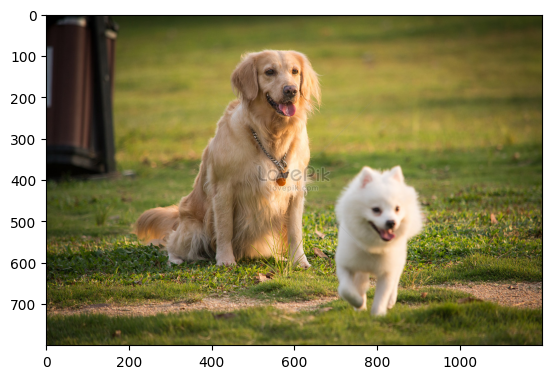

In [6]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

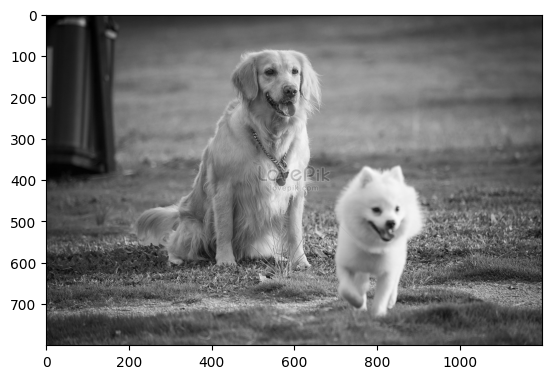

In [5]:
plt.imshow(gray,cmap='gray')

Q1

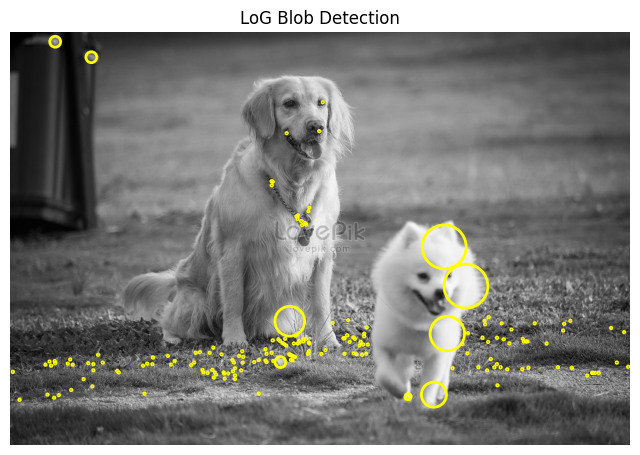

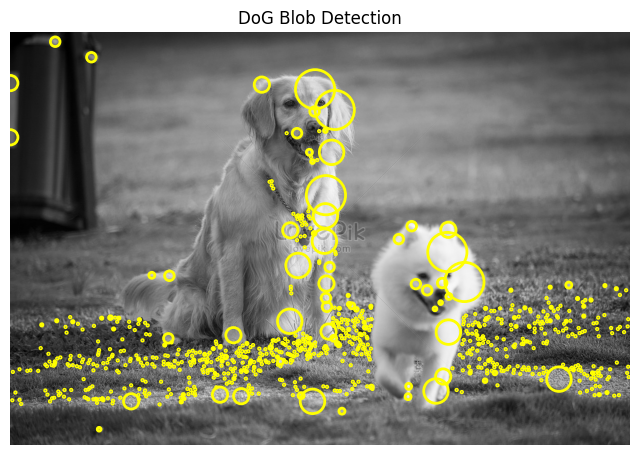

In [12]:
from skimage.feature import blob_log, blob_dog
log_blobs = blob_log(gray, max_sigma=30, num_sigma=10, threshold=0.2)
#max_sigma=30	Max size of blobs detect karne ke liye
#num_sigma=10	Kitne different sigma values test hongi multi-scale detection ke liye
#DoG (Difference of Gaussian)
dog_blobs = blob_dog(gray, max_sigma=30, sigma_ratio=1.6, threshold=0.1)#0.2 will give less noise than 0.1

# radius (sigma)
log_blobs[:, 2] = log_blobs[:, 2] * np.sqrt(2)
dog_blobs[:, 2] = dog_blobs[:, 2] * np.sqrt(2)

# Function to display blobs
def show_blobs(image, blobs, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image, cmap='gray')

    for blob in blobs:
        y, x, r = blob
        circ = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
        ax.add_patch(circ)

    plt.title(title)
    plt.axis("off")
    plt.show()

# Show images with detected blobs
show_blobs(gray, log_blobs, "LoG Blob Detection")
show_blobs(gray, dog_blobs, "DoG Blob Detection")

Q2

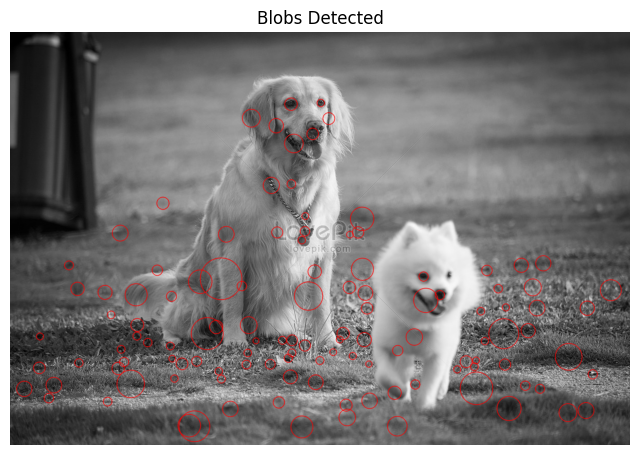

In [23]:
# Create detector parameters
params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 10   # Lower threshold to detect weaker blobs
params.maxThreshold = 150  # Set upper threshold to limit bright pixels

# Filter by area (larger and smaller blobs detection)
params.filterByArea = True
params.minArea = 100      # Detect blobs bigger than 100 pixels
params.maxArea = 5000

params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)

# Detecting blobs in the grayscale image
keypoints = detector.detect(gray)

# Draw
img_with_blobs = cv2.drawKeypoints(gray, keypoints, np.array([]), (255, 0, 0),
                                   cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(8, 8))
plt.imshow(img_with_blobs, cmap='gray')
plt.axis("off")
plt.title("Blobs Detected")
plt.show()


Q3

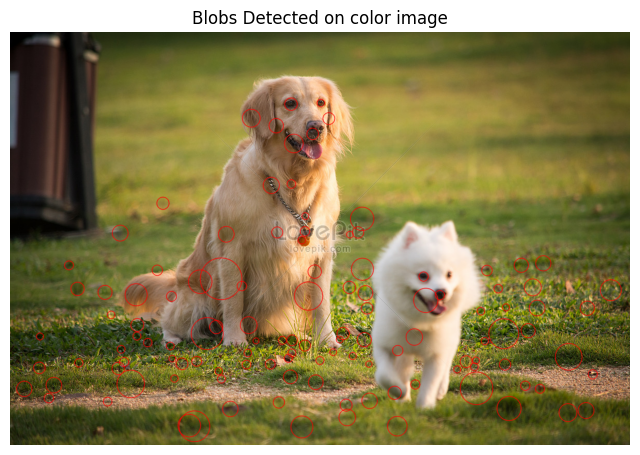

In [25]:
# Create detector parameters
params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 10   # Lower threshold to detect weaker blobs
params.maxThreshold = 150

# Filter by area (larger and smaller blobs detection)
params.filterByArea = True
params.minArea = 100      # Detect blobs bigger than 100 pixels
params.maxArea = 5000

params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)

# Detecting blobs in the grayscale image
keypoints = detector.detect(gray)

# Draw
img_with_blobs = cv2.drawKeypoints(img, keypoints, np.array([]), (255, 0, 0),
                                   cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(8, 8))
plt.imshow(img_with_blobs)
plt.axis("off")
plt.title("Blobs Detected on color image")
plt.show()


Q4

<ipython-input-29-f73aab0db9d8>:10: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  shi_tomasi_corners = np.int0(shi_tomasi_corners)


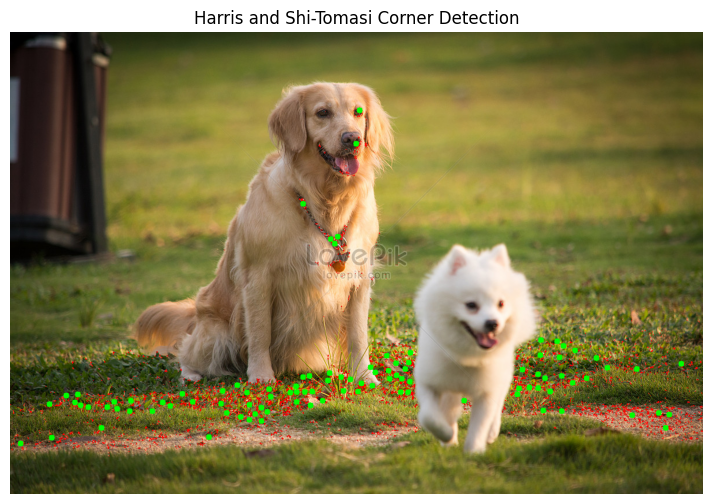

In [29]:
# Harris Corner Detection
gray_harris = np.float32(gray)
harris_corners = cv2.cornerHarris(gray_harris, blockSize=2, ksize=3, k=0.04)

# Mark Harris corners in red
img[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]  # Red color for Harris corners

# Shi-Tomasi Corner Detection
shi_tomasi_corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_tomasi_corners = np.int0(shi_tomasi_corners)

for corner in shi_tomasi_corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 5, (0, 255, 0), -1)  # Green circles for Shi-Tomasi corners

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title('Harris and Shi-Tomasi Corner Detection')
plt.show()